# CDFs

Hello, guys! In this notebook, we will talk about and practice CDF - the Cumulative Distribution Function - with the help of the data, modules and classes from the *Think Stats* book (O'Reilly), courtesy from its author, Allen B. Downey.

## Definition

As the name suggests, a CDF is a *function* of *x*, where *x* is any value that might appear in a specific distribution, which maps its **percentile rank**. But what is a percentile rank?

A *percentile* of *x* is the **fraction of the data from some distribution that is equal to or below** that value multiplied by 100.

For example, imagine that there are 5 people in your house - including you - and you're the 3rd tallest (or smallest) person, with 5'8"/1,73 m. Therefore, with respect to the distribution of heights in your house, the *percentile* of your height is 60, since there are 3 people (2 relatives + you, from a total of 5) with a height equal to or below 5'8"/1,73 m. The calculation is simple:



In [1]:
(3/5) * 100

60.0

Thus, that's why the CDF is a *cumulative* function; when we sort the values from a distribution upwardly, as the value of *x* increases, the accumulated number of values below or equal to *x* increases.

You must be asking yourself whats is the difference between "percentile" and "percentile rank"; in a more general context, they're basically the same thing. However, within the Cdf class in the `thinkstats2` script that we will use, they're two different *functions*. We will see them in details later.

Now, let's practice CDFs with some data!

In [2]:
# mounting my Google Drive

import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/code')

from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

%cd gdrive/My Drive/Colab Notebooks/code

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/code


In [3]:
#importing all the scripts + libraries
import thinkstats2
import nsfg
import thinkplot
import first
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)

## Data

The data we will use is from the National Survey of Family Growth (NSFG), conducted by the U.S. Centers for Disease Control and Prevention (CDC) since 1973. More information about this survey can be found on http://cdc.gov/nchs/nsfg.htm.

More specifically, we will compare first pregnancy data with other pregnancies data.

## Representing CDFs

The `thinkstats2` script provides a class named Cdf that represents CDFs. Its fundamental methods are:

- Prob(x): given a value *x*, computes the probability p = CDF(x)
- Value(p): given a probability *p*, returns the value *x* which CDF(x) = p

The Cdf constructor can take as an argument a list of values, a pandas Series, another Cdf, etc. to construct a Cdf object. 

## Implementation

The code below is divided in multiple parts:
1. **Importing data**: Import the datasets of all completed pregnancies (`live` DataFrame); only first pregnancies (`firsts`) and only pregnancies posterior to the first (`others`); -->
2. **Creating a Cdf object**: Make a Cdf for the distribution of pregnancy lengths (the `prglngth` Series from the `live` DataFrame), invoked by the `MakeFrames()` method from the `first` script.
3. **Creating and displaying the CDF plot**: "Transform" the Cdf object into a CDF plot with the `Cdf` function from the `thinkplot` script.



In [14]:
live, firsts, others = first.MakeFrames()
cdf = thinkstats2.Cdf(live.prglngth, label = 'prglngth')

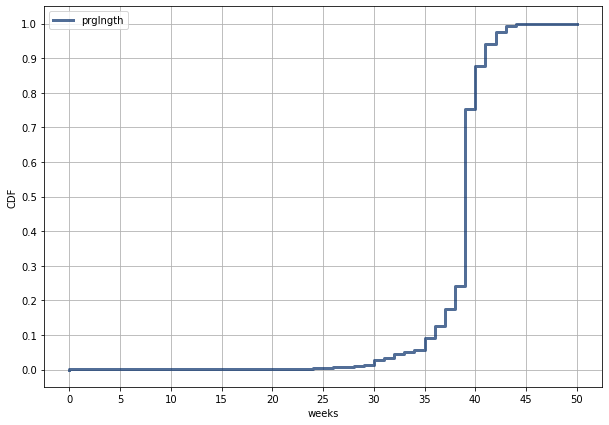

<Figure size 576x432 with 0 Axes>

In [21]:
thinkplot.Cdf(cdf)
plt.grid()
thinkplot.Show(xlabel= 'weeks', ylabel= 'CDF',
               xticks= np.arange(min(live.prglngth), max(live.prglngth) + 1,
                                        5.0),
               yticks= np.arange(0, 1.1, 0.1))

With a PDF we can have useful insights: 10% of the pregnancies length are equal to or less than 36 weeks, while approximately 90% of them are equal to or less than 41 weeks.
Other evident information is the distribution shape; frequent values are represented with a steep or even vertical line on the plot. In our example, the 39 weeks mode is easy to detect.

## Comparing CDFs

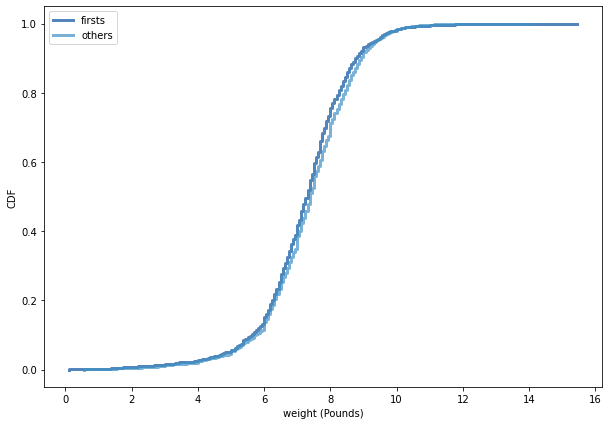

<Figure size 576x432 with 0 Axes>

In [22]:
firsts_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label= 'firsts')
others_cdf = thinkstats2.Cdf(others.totalwgt_lb, label= 'others')

thinkplot.PrePlot(2)                                                            #this function "prepares" thinkplot to plot 2 graphs on the same figure
thinkplot.Cdfs([firsts_cdf, others_cdf])
thinkplot.Show(xlabel= 'weight (Pounds)', ylabel= 'CDF')

In [7]:
print(round(firsts.totalwgt_lb.mean(),2), round(others.totalwgt_lb.mean(),2))

7.2 7.33


## Percentile based stattistics

In [8]:
firsts_cdf.PercentileRank(5.5)        #given a value x, computes its 100 * CDF

9.305523722209488

In [9]:
firsts_cdf.Percentile(50)             #given a percentile (in this case, is the MEDIAN), returns the correspondent x value

7.3125

## Random numbers

In [10]:
weights = live.totalwgt_lb
cdf = thinkstats2.Cdf(weights, label = 'totalwgt_lb')

In [11]:
sample = np.random.choice(weights, 100, replace=True)
ranks = [cdf.PercentileRank(x) for x in sample]

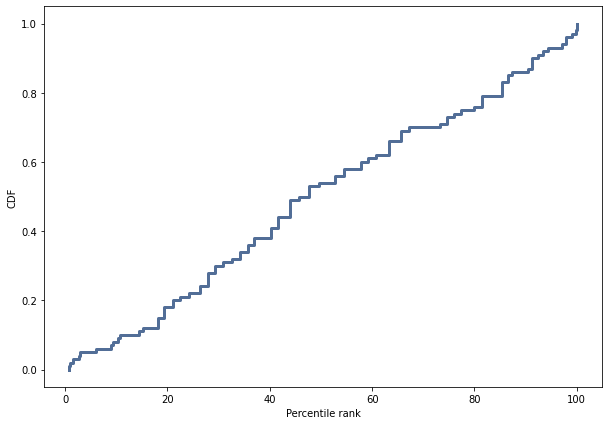

<Figure size 576x432 with 0 Axes>

In [12]:
ranks_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(ranks_cdf)
thinkplot.Show(xlabel = 'Percentile rank', ylabel= 'CDF')

This line is straight/linear because of the way that a CDF is defined; as we would expect, 40% of the sample is below the 40 percentile rank, 60% below the 60 percentile rank, and so on.